# Amazon Demand Forecasting


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation           

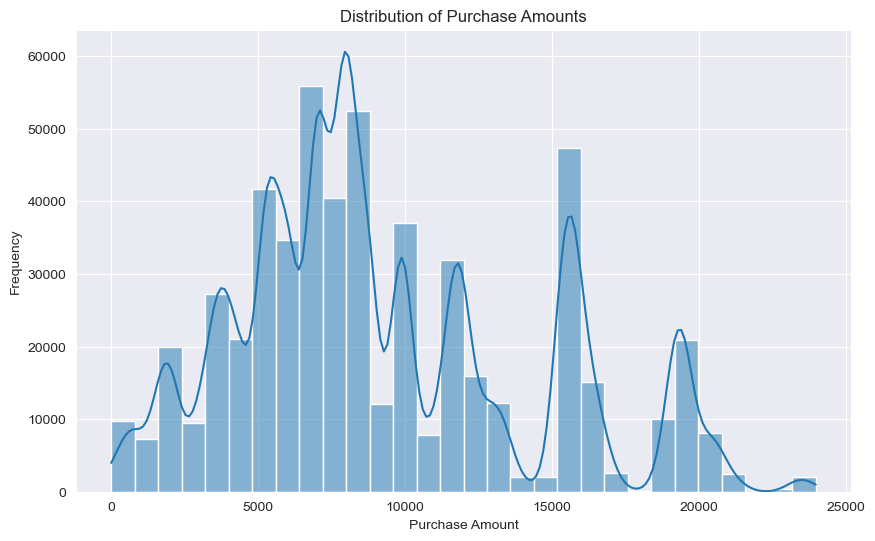

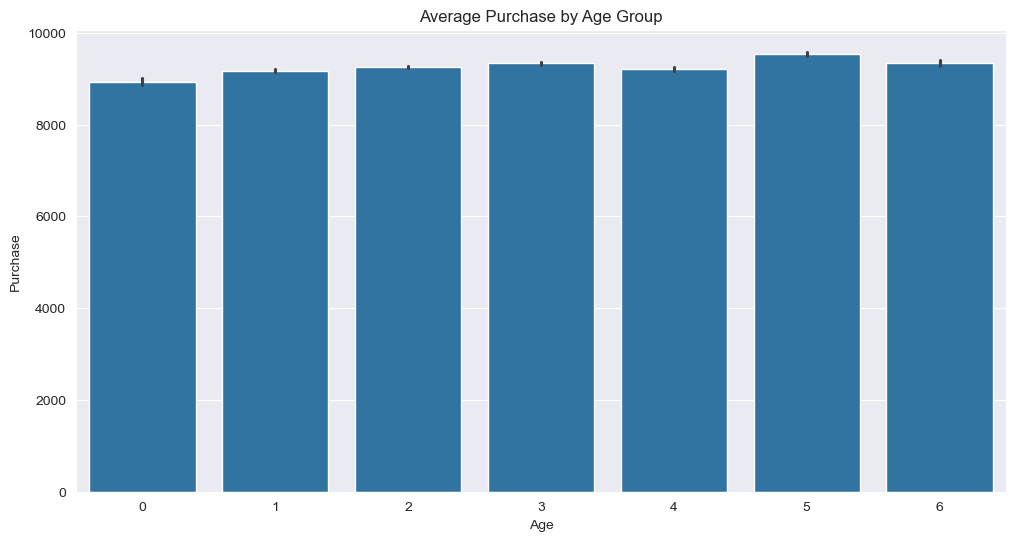

Mean Squared Error: 7650991.780155506
R-squared Score: 0.6964166242495857


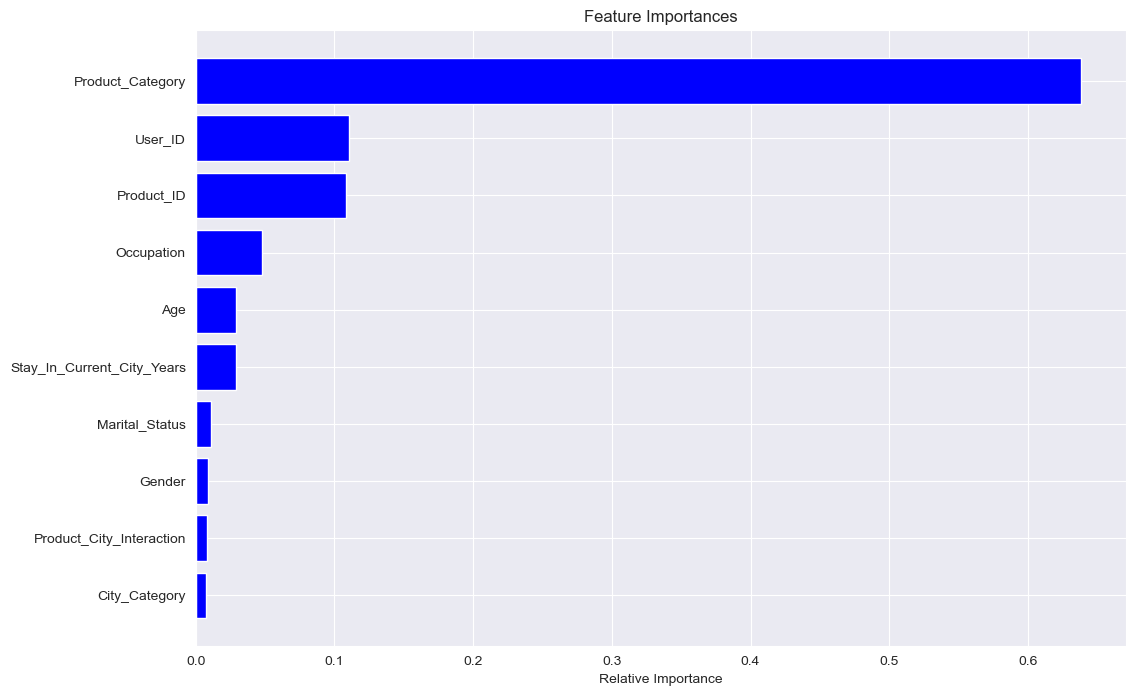

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
# Adjust filename and path as necessary
df = pd.read_csv("data/amazon.csv")

# Display the first few rows of the dataset
df.head()

# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Inspect the summary statistics of numeric columns
df.describe()

# Handle missing values if any (assuming none for now)
# Encode categorical variables for 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'

# Convert 'Stay_In_Current_City_Years' to numeric, replacing '4+' with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

# Encode categorical variables using Label Encoding for simplicity
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])  # Only include if 'Product_ID' is necessary


# Inspect the transformed dataset
df.head()

# Distribution of 'Purchase' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Explore average purchase amount by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase', data=df, estimator=np.mean)
plt.title('Average Purchase by Age Group')
plt.show()

# Creating new feature - Interaction between 'Product_Category' and 'City_Category'
df['Product_City_Interaction'] = df['Product_Category'] * df['City_Category']

# Creating a binary feature based on purchase behavior (e.g., high vs low purchase amount)
df['High_Purchase'] = np.where(df['Purchase'] > df['Purchase'].median(), 1, 0)

# Selecting features and target variable
X = df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Product_City_Interaction']]
y = df['Purchase']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Save the processed dataset
df.to_csv("data/processed_amazon_purchase_data.csv", index=False)
